In [11]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Importing data
# Use pandas to get some insights into the data
house_rental_data = pd.read_csv("~/Desktop/Machine Learning/house_rental_data.csv")
house_rental_data.head()

,Sqft,Floor,Total_Floor,Bedroom,Living_Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [17]:
house_rental_data.tail()

,Sqft,Floor,Total_Floor,Bedroom,Living_Room,Bathroom,Price
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000
644,1376.946,6,7,3,2,1,36000


In [18]:
house_rental_data.dtypes

Sqft           float64
Floor            int64
Total_Floor      int64
Bedroom          int64
Living_Room      int64
Bathroom         int64
Price            int64
dtype: object

In [19]:
house_rental_data.describe()

,Sqft,Floor,Total_Floor,Bedroom,Living_Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [20]:
x = house_rental_data.shape
print("\n shape of: \n",x)

y = house_rental_data.size
print("\n size of : \n",y)


 shape of: 
 (645, 7)

 size of : 
 4515


In [21]:
house_rental_data[house_rental_data["Sqft"] >= 300.000]

,Sqft,Floor,Total_Floor,Bedroom,Living_Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [22]:
house_rental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   Total_Floor  645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living_Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [23]:
house_rental_data.isnull().count()

Sqft           645
Floor          645
Total_Floor    645
Bedroom        645
Living_Room    645
Bathroom       645
Price          645
dtype: int64

In [24]:
house_rental_data["Sqft"].value_counts()

711.600     21
925.080     13
2134.800    11
1707.840    10
2063.640    10
            ..
1106.538     1
882.384      1
665.346      1
1209.720     1
1376.946     1
Name: Sqft, Length: 288, dtype: int64

In [25]:
house_rental_data["Bathroom"].value_counts()

2    386
1    198
3     46
4     10
5      4
0      1
Name: Bathroom, dtype: int64

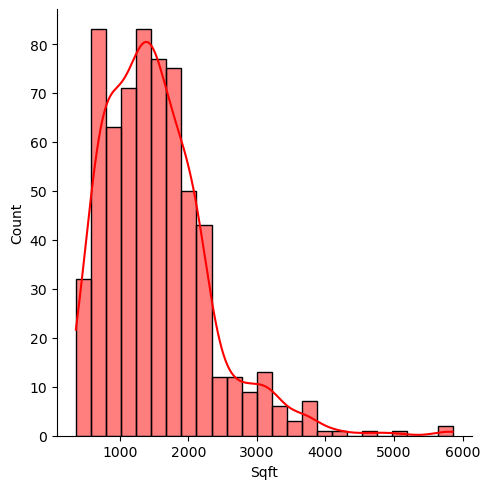

In [33]:
# Show some interesting visualization of the data
sns.displot(house_rental_data['Sqft'],kde = True , color = "r")

<AxesSubplot:xlabel='Sqft', ylabel='Bathroom'>

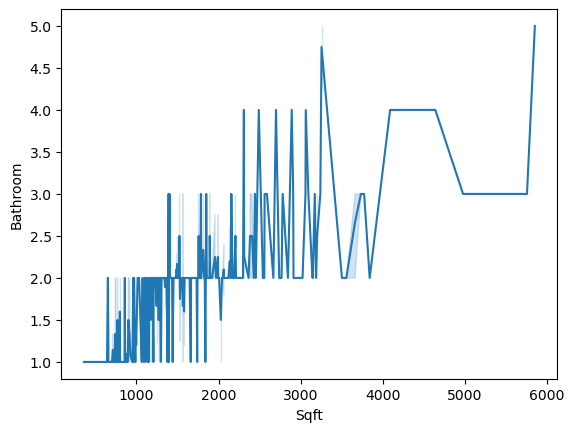

In [34]:
sns.lineplot(x = house_rental_data["Sqft"], y = house_rental_data["Bathroom"])

<AxesSubplot:>

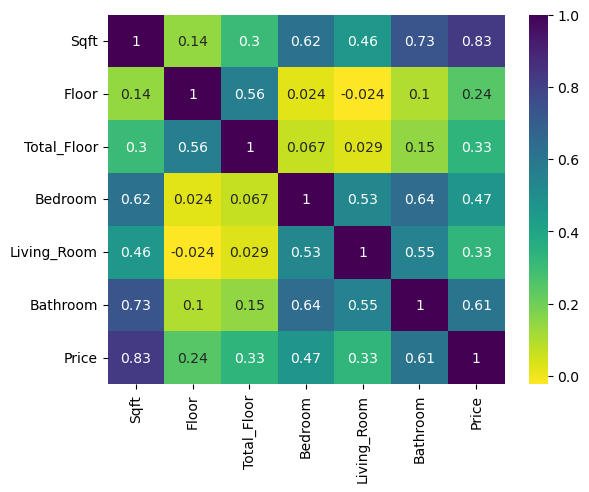

In [36]:
sns.heatmap(house_rental_data.corr(), annot = True,cmap = plt.cm.get_cmap('viridis_r') )

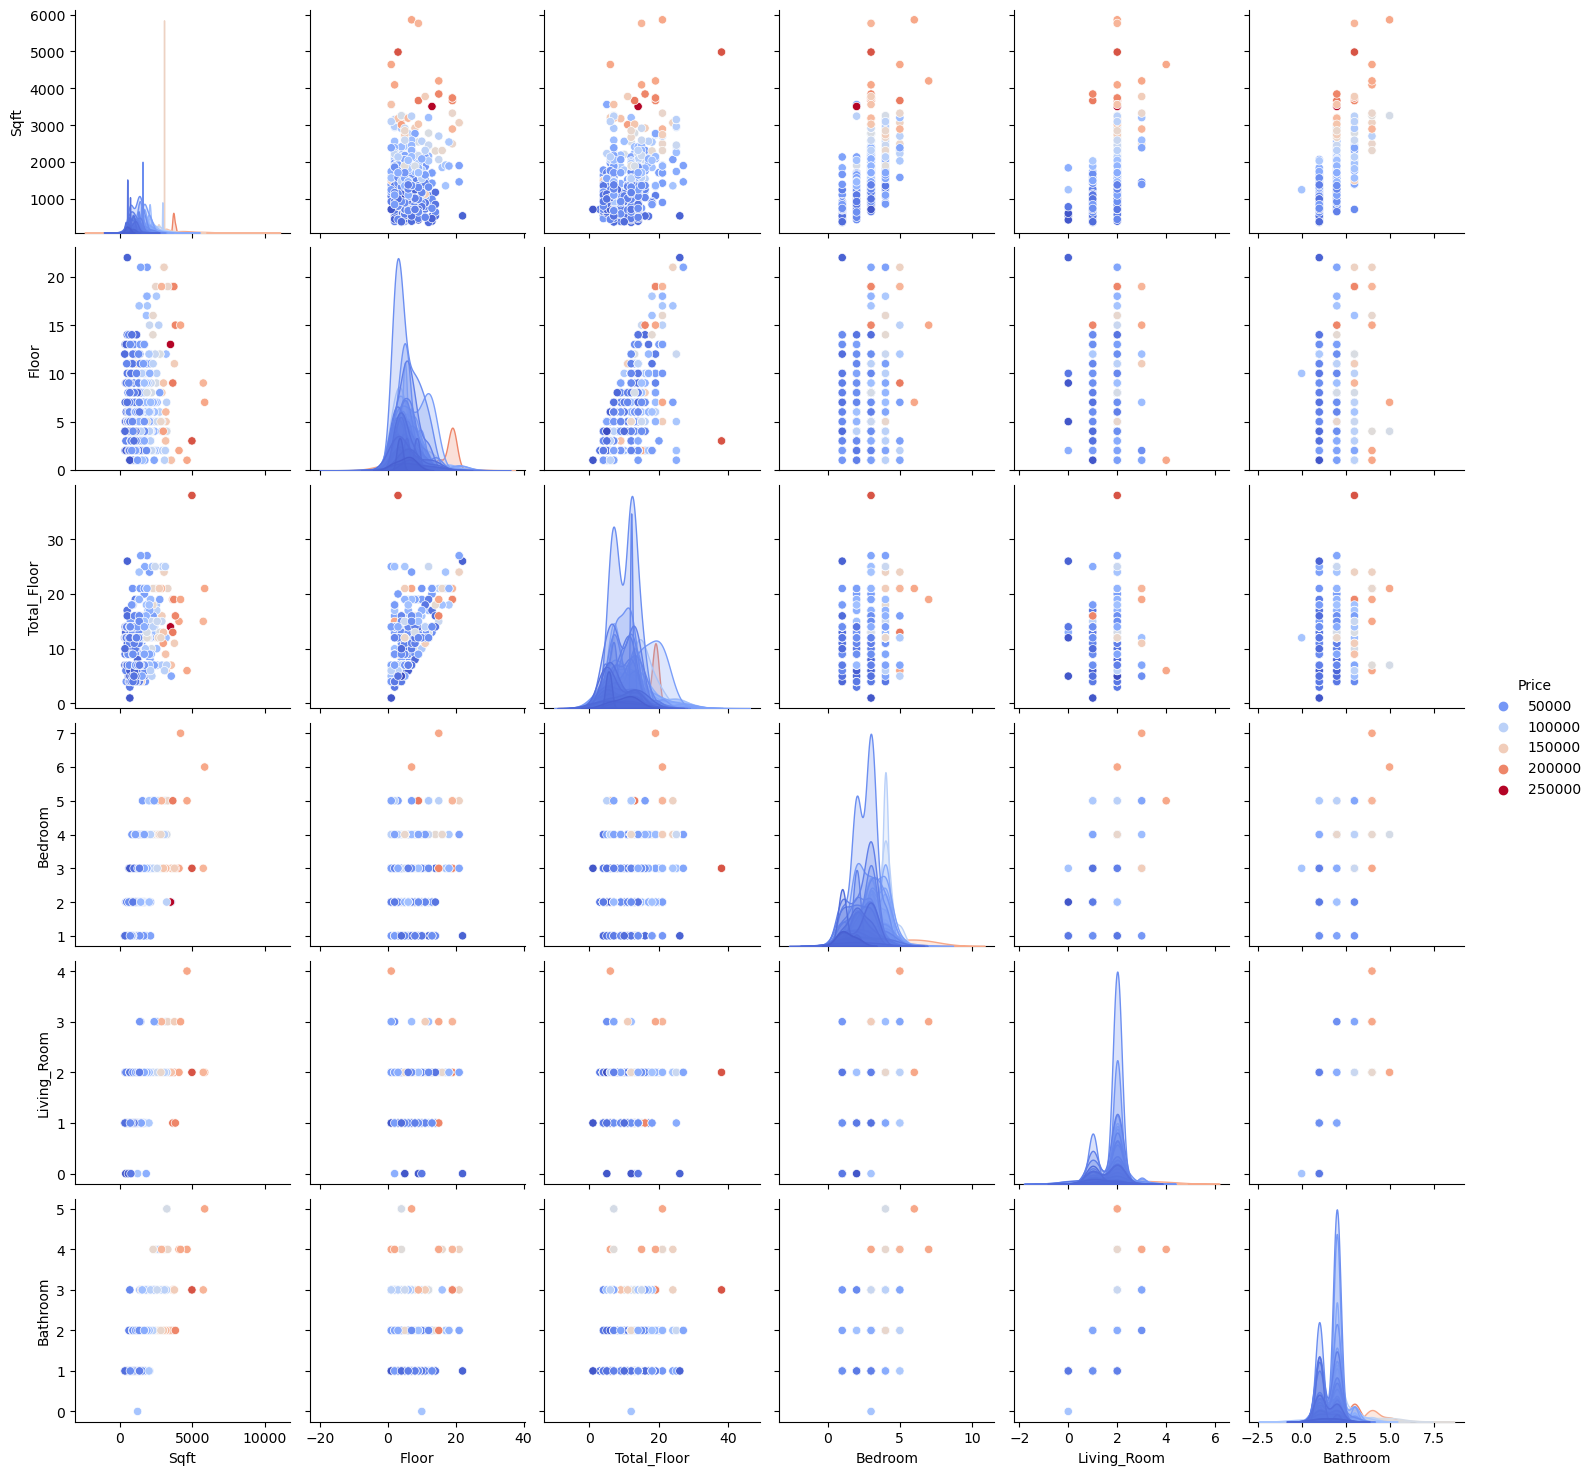

In [43]:
sns.pairplot(data = house_rental_data,hue = "Price",palette = 'coolwarm')

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

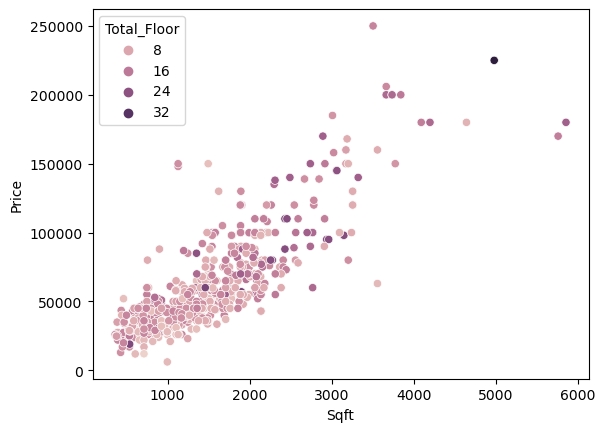

In [45]:
sns.scatterplot(data=house_rental_data,x = house_rental_data['Sqft'],y = house_rental_data["Price"],hue = "Total_Floor")


In [46]:
# Manage Data for Training and Testing
from scipy import stats
x = np.abs(stats.zscore(house_rental_data))
print(x)

         Sqft     Floor  Total_Floor   Bedroom  Living_Room  Bathroom  \
0    0.456393  1.014897     0.772347  0.828956     0.402694  0.276918   
1    0.791798  0.242042     0.772347  1.151328     0.402694  0.276918   
2    0.507434  0.242042     0.772347  0.828956     0.402694  1.187117   
3    0.089824  1.014897     0.772347  0.161186     0.402694  0.276918   
4    0.730160  1.303669     0.629803  0.161186     0.402694  0.276918   
..        ...       ...          ...       ...          ...       ...   
640  0.219747  0.273195     0.830110  0.161186     0.402694  0.276918   
641  1.500419  0.499660     0.171426  1.819099     1.761785  1.187117   
642  1.027127  1.818907     0.629803  1.819099     1.761785  1.187117   
643  0.234984  0.757279     0.629803  0.161186     0.402694  0.276918   
644  0.196547  0.015577     0.772347  0.161186     0.402694  1.187117   

        Price  
0    0.000370  
1    0.449714  
2    0.111966  
3    0.477058  
4    0.477058  
..        ...  
640  0.4770

In [47]:
X = house_rental_data.drop(labels = ['Price'] , axis = 1)
y = house_rental_data['Price']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [49]:
scaler = MinMaxScaler(feature_range = (0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [50]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier

In [51]:
rmse = []
for k in range(1,21):
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = sqrt(mean_squared_error(y_test,y_pred))
    rmse.append(error)
    
    print('RMSE for k =',k,'is',error)

RMSE for k = 1 is 32850.451664682536
RMSE for k = 2 is 27745.13060563319
RMSE for k = 3 is 25167.737314170165
RMSE for k = 4 is 24287.88960213673
RMSE for k = 5 is 23474.36803436939
RMSE for k = 6 is 23323.951046752547
RMSE for k = 7 is 23524.206679339135
RMSE for k = 8 is 23083.489993810108
RMSE for k = 9 is 23115.56045058988
RMSE for k = 10 is 23109.51759467692
RMSE for k = 11 is 22919.264730645013
RMSE for k = 12 is 23202.290108412242
RMSE for k = 13 is 22965.29731558111
RMSE for k = 14 is 22836.322687201442
RMSE for k = 15 is 22993.645929624796
RMSE for k = 16 is 23095.81070664854
RMSE for k = 17 is 23144.348053957685
RMSE for k = 18 is 23303.153908061056
RMSE for k = 19 is 23460.78113912874
RMSE for k = 20 is 23539.06228322625


<AxesSubplot:>

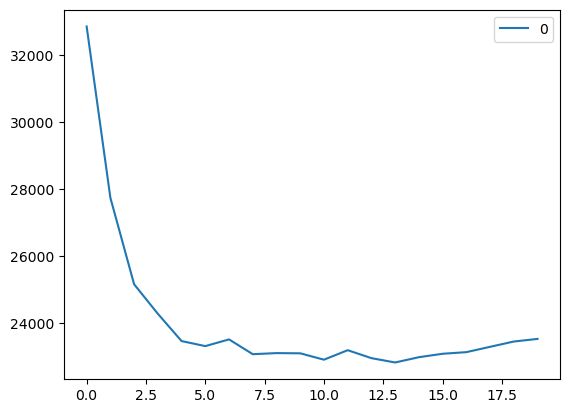

In [52]:
curve = pd.DataFrame(rmse)
curve.plot()